<img src='Cover5-01.png'>

## Семинар N. Анализ текстов

### Введение

- Сложности работы с естественными языками
<img src='Syntax_tree.svg.png' height="400" width="400">
<img src='drovedown.png' height="400" width="1000">




   Обработка естественного языка (**Natural Language Processing**) -- область, которая занимается тем, что написано в ее названии.

- Вот несколько распространенных примеров использования NLP:

    - проверка правописания в Microsoft Word
    - анализ тональности текста (Sentiment analysis, Opinion mining) 
    - фильтрация спама
    - извлечение терминов из текста, саммаризация
    - перевод текстов
    - диалоговые системы (чат-боты)
    - обнаружение тем в тексте -- **тематическое моделирование (Topic modeling)**
    
    

### Тематическое моделирование

$D$ -- множество текстовых документов, $W$ -- множество слов документов, $T$ -- множество тем 

Наблюдаемые переменные:

$\hspace{4ex} p(w|d) \approx n_{dw} / n_d$ -- вероятность термина $w$ в документе $d$.

Неизвестные переменные:

$\hspace{4ex} p(w|t)$ -- вероятность термина $w$ в теме $t$

$\hspace{4ex} p(t|d)$ -- вероятность темы $t$ в документе $d$

Считаем, что вероятность найти слово $w$ в теме $t$ не зависит от документа: $p(w| d, t)=p(w|t)$, тогда по формуле полнй вероятности:

$$p(w|d) = \sum_{t \in T} p(w| d, t) p(t|d) = \sum_{t \in T} p(w| t) p(t|d)$$

Принцип максимума правдоподобия:
$$p(D) = \prod_{i=1}^n p(d_i, w_i) = \prod_{d \in D} \prod_{w\in d} p(d, w)^{n_{dw}} \rightarrow max$$

$$\log p(D) = \sum_{d \in D} \sum_{w\in d} n_{dw} \log p(d, w) \rightarrow max$$

$$\sum_{d \in D} \sum_{w\in d} n_{dw} \log \sum_{t \in T} p(w| t) p(t|d) \rightarrow max$$

Задача решается EM-алгоритмом для выделения "скрытых вероятностей".

<img src='tm0.png'  width="1000">
<img src='pn_level0.png'  width="950">

### Предобработка текста для тематического моделирования
 - Приведение всех слов к нормальной форме (лемматизация или стемминг)
 - Выделение терминов (term extraction)
 - Удаление стоп-слов и слишком редких слов

### Построим свою тематическую модель 

Будем использовать open source библиотеку для тематического моделирования BigARTM (https://bigartm.org).

Процесс установки описан в документации.

In [6]:
%matplotlib inline
import glob
import os
import matplotlib.pyplot as plt

import artm

artm.version()

'0.8.3'

In [22]:
data_path = 'postnauka.txt'
data_path_batches = 'batches/'
if len(glob.glob(data_path_batches + "/*.batch")) < 1:
    batch_vectorizer = artm.BatchVectorizer(data_format='vowpal_wabbit', data_path = data_path, 
                                            target_folder=data_path_batches)
else:
    batch_vectorizer = artm.BatchVectorizer(data_path=data_path_batches, data_format='batches')

In [52]:
dict_path = 'dictionary.txt'
if not os.path.isfile(dict_path):
    dictionary = artm.Dictionary('dictionary')
    dictionary.gather(batch_vectorizer.data_path)
    dictionary.save_text(dict_path)
else:
    dictionary = artm.Dictionary('dictionary')
    dictionary.load_text(dict_path)

In [53]:
topic_names=['topic_{}'.format(i) for i in range(15)]
class_ids = {'text':1.0}
scores_list = []
scores_list.append(artm.TopTokensScore(name='TopTokensScore', class_id = 'text', num_tokens=10))
scores_list.append(artm.PerplexityScore(name='PerplexityScore'))


model = artm.ARTM(topic_names = topic_names, class_ids = class_ids, scores = scores_list, cache_theta=True)
model.initialize(dictionary=dictionary)

In [54]:
model.fit_offline(batch_vectorizer, num_collection_passes=15)

Выведем слова, имеющие 10 наибольших значений вероятности для каждой из тем:

In [55]:
output = ""
tokens = model.score_tracker["TopTokensScore"].last_tokens
for topic_name in model.topic_names:
    output += topic_name + ': '
    for word in tokens[topic_name]:    
        output += word + ' '
    output += '\n'
print(output)

topic_0: право закон церковь римский женщина имя король власть культура бог 
topic_1: социальный пространство социология объект общество отношение понятие сообщество действие форма 
topic_2: научный университет ученый образование школа заниматься знание хороший студент философия 
topic_3: мозг лекция нейрон клетка организм растение бактерия postnauka место животное 
topic_4: информация внимание память задача автор данные речь сеть поведение коммуникация 
topic_5: молекула метод структура материал задача белок использовать днк технология компьютер 
topic_6: политический фильм власть кино свобода автор русский идея текст смысл 
topic_7: война советский политический россия русский революция исторический германия государство историк 
topic_8: страна экономический экономика государство рынок компания россия рост уровень государственный 
topic_9: частица квантовый физика поле модель энергия взаимодействие кварк электрон пространство 
topic_10: русский текст словарь звук языковой лингвист гла

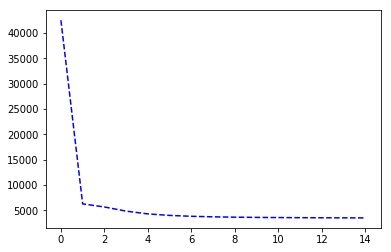

In [56]:
plt.plot(model.score_tracker['PerplexityScore'].value, 'b--')

In [89]:
pwt = model.get_phi()
pwt

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
greek,1.559266e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
eros,3.118531e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
анакреонт,4.677797e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
acute,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.048344e-05,0.000000e+00,0.000000e+00,0.000000e+00
multicriterial,0.000000e+00,2.761533e-09,1.023494e-12,0.000000e+00,0.000000e+00,1.488522e-05,0.000000e+00,0.000000e+00,1.420894e-08,0.000000e+00,0.000000e+00,1.425445e-07,0.000000e+00,0.000000e+00,0.000000e+00
якуб,0.000000e+00,9.735431e-09,1.611632e-12,0.000000e+00,0.000000e+00,1.420709e-05,0.000000e+00,0.000000e+00,1.583521e-08,0.000000e+00,0.000000e+00,1.056093e-06,0.000000e+00,0.000000e+00,0.000000e+00
литвак,0.000000e+00,1.030625e-07,8.687043e-12,0.000000e+00,0.000000e+00,1.033349e-05,0.000000e+00,0.000000e+00,3.085155e-07,0.000000e+00,0.000000e+00,5.787236e-06,0.000000e+00,0.000000e+00,0.000000e+00
вольский,0.000000e+00,4.927568e-09,6.872172e-13,0.000000e+00,0.000000e+00,1.436654e-05,0.000000e+00,0.000000e+00,8.618582e-09,0.000000e+00,0.000000e+00,8.556290e-07,0.000000e+00,0.000000e+00,0.000000e+00
малдун,1.559238e-05,0.000000e+00,2.490998e-10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.004537e-14,0.000000e+00,0.000000e+00,1.261163e-15,0.000000e+00,0.000000e+00,0.000000e+00
stress,0.000000e+00,0.000000e+00,0.000000e+00,7.704157e-13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.120861e-05,2.892602e-16,0.000000e+00,0.000000e+00


In [90]:
print(pwt['topic_0'][tokens['topic_0']])

право       0.012200
закон       0.004016
церковь     0.003814
римский     0.003791
женщина     0.003787
имя         0.003693
король      0.003596
власть      0.003065
культура    0.002981
бог         0.002958
Name: topic_0, dtype: float32


In [75]:
ptd = model.get_theta()
ptd

,0,1,2,3,4,5,6,7,8,9,...,2966,2967,2968,2969,2970,2971,2972,2973,2974,2975
topic_0,0.006700,0.000860,0.000344,0.000319,0.000310,0.020832,0.692987,0.001412,0.000127,0.000167,...,0.000226,4.523692e-07,0.265726,0.002227,6.058782e-06,0.000173,0.000029,0.920322,0.000057,0.000697
topic_1,0.755100,0.000303,0.923284,0.894610,0.006613,0.009293,0.006189,0.000239,0.639888,0.009013,...,0.000566,3.104654e-05,0.091805,0.249237,1.917048e-01,0.000232,0.000341,0.033167,0.003723,0.000067
topic_2,0.058339,0.011477,0.024668,0.085961,0.001761,0.315409,0.002144,0.006368,0.119111,0.019895,...,0.003464,1.493272e-04,0.242629,0.099691,2.249896e-01,0.001218,0.000679,0.001062,0.006482,0.062871
topic_3,0.000215,0.008040,0.001317,0.000194,0.004771,0.006635,0.000436,0.006195,0.000147,0.001954,...,0.441402,6.938642e-05,0.000909,0.000184,4.187692e-06,0.608363,0.018519,0.000584,0.458653,0.738648
topic_4,0.005596,0.002793,0.018575,0.001011,0.002379,0.045181,0.001981,0.002988,0.198376,0.018928,...,0.000590,2.831978e-03,0.017100,0.054159,1.644851e-02,0.000348,0.000146,0.003556,0.001348,0.006432
topic_5,0.009160,0.113820,0.000484,0.000534,0.001371,0.068514,0.000558,0.012097,0.002710,0.002784,...,0.131874,9.334992e-01,0.000545,0.000649,1.425908e-01,0.008350,0.000691,0.000018,0.475856,0.000036
topic_6,0.002550,0.000704,0.004658,0.000807,0.000448,0.024455,0.164641,0.000967,0.003395,0.001102,...,0.000307,4.070838e-06,0.026082,0.000548,4.584529e-04,0.000756,0.000055,0.010669,0.000105,0.002751
topic_7,0.125317,0.031847,0.003930,0.010766,0.000586,0.053777,0.038945,0.007800,0.020227,0.007437,...,0.004336,1.603583e-06,0.099229,0.003412,2.390533e-03,0.000698,0.001483,0.008330,0.000520,0.000190
topic_8,0.021843,0.182512,0.006805,0.001254,0.000893,0.021642,0.030989,0.023444,0.008715,0.011570,...,0.127822,5.900880e-04,0.166259,0.061445,2.402811e-01,0.000785,0.007258,0.000042,0.008749,0.000403
topic_9,0.000884,0.254819,0.001043,0.000607,0.000574,0.322247,0.000046,0.000988,0.000377,0.122148,...,0.000135,1.610397e-02,0.004245,0.005757,1.534741e-04,0.000288,0.000265,0.000187,0.005423,0.000058


### Задание

Слова, характеризующие темы, имеют большую вероятность $p(w|t)$ для тем, к которым они относятся и намнного меньшую вероятность для остальных тем. Если же слово часто встречается в каждой теме, то вероятно, что оно относится к общей (фоновой) лексике, которая не является специфической ни для одной из тем. 

Используя полученную модель, найдите слова, для которых вероятность встретиться в каждой из тем не меньше 0.0005.

In [117]:
pwt_T = pwt.transpose()
for w in pwt_T.columns:
    if sum(pwt_T[w]>0.0005)==15:
        print(w)

определенный
создавать
общий
появляться
место
связанный
представлять
момент
последний
число
идти
показывать
точка
второй
приводить
сторона
часть
связывать
зрение
вид
оставаться
